
🔹 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        100 non-null    int64 
 1   Airport     100 non-null    object
 2   Code        100 non-null    object
 3   Location    100 non-null    object
 4   Country     100 non-null    object
 5   Passengers  100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB

🔹 Estadísticas descriptivas:
             Rank    Passengers
count  100.000000  1.000000e+02
mean    50.500000  4.296139e+07
std     29.011492  1.837881e+07
min      1.000000  2.312940e+07
25%     25.750000  2.779686e+07
50%     50.500000  3.940401e+07
75%     75.250000  5.069779e+07
max    100.000000  1.039030e+08

🔹 Aeropuertos con más tráfico:
                                            Airport  Passengers
0  Hartsfield–Jackson Atlanta International Airport   103902992
1            

/var/folders/09/w_db8nmn3gz3jg3kjf4qn50m0000gn/T/ipykernel_99173/3091663460.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




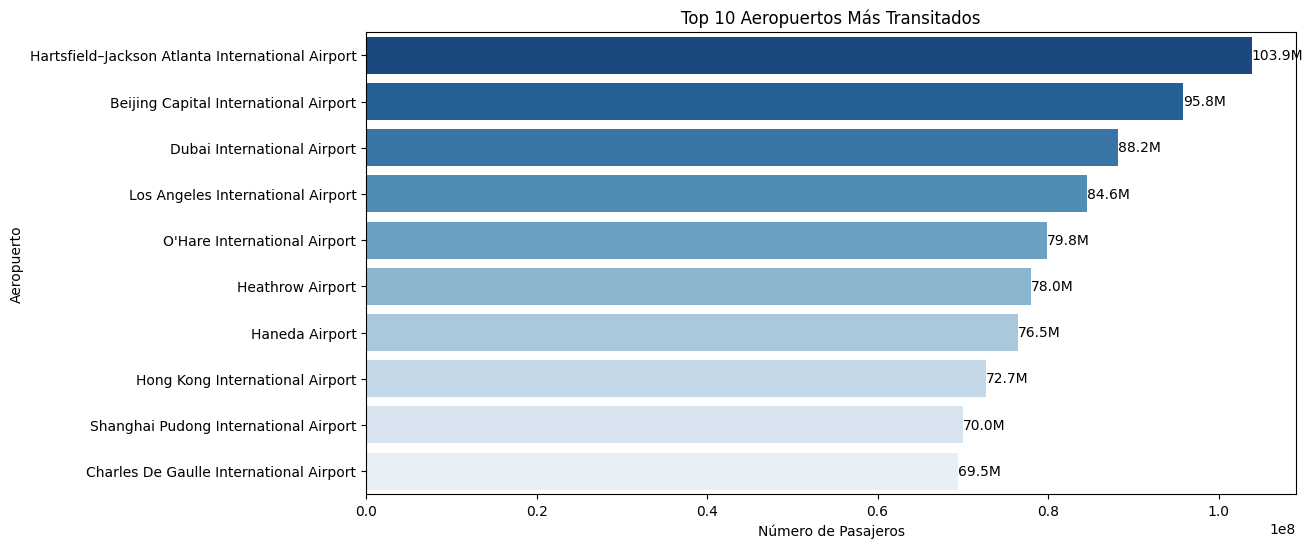

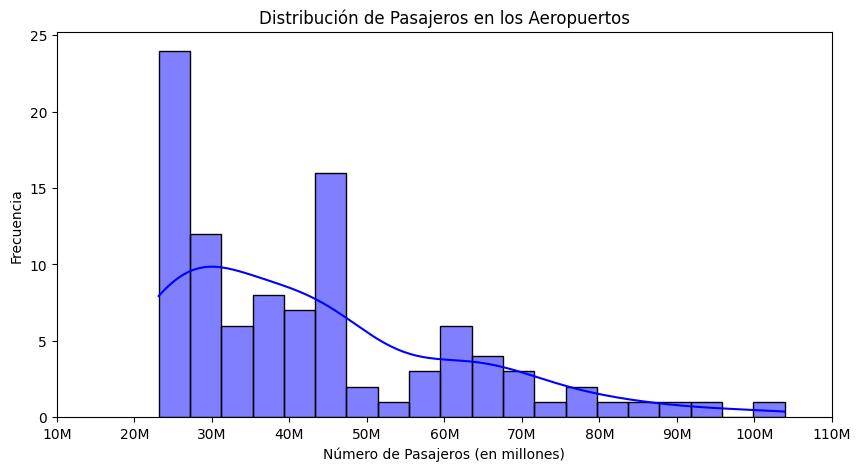

<Figure size 1200x800 with 0 Axes>

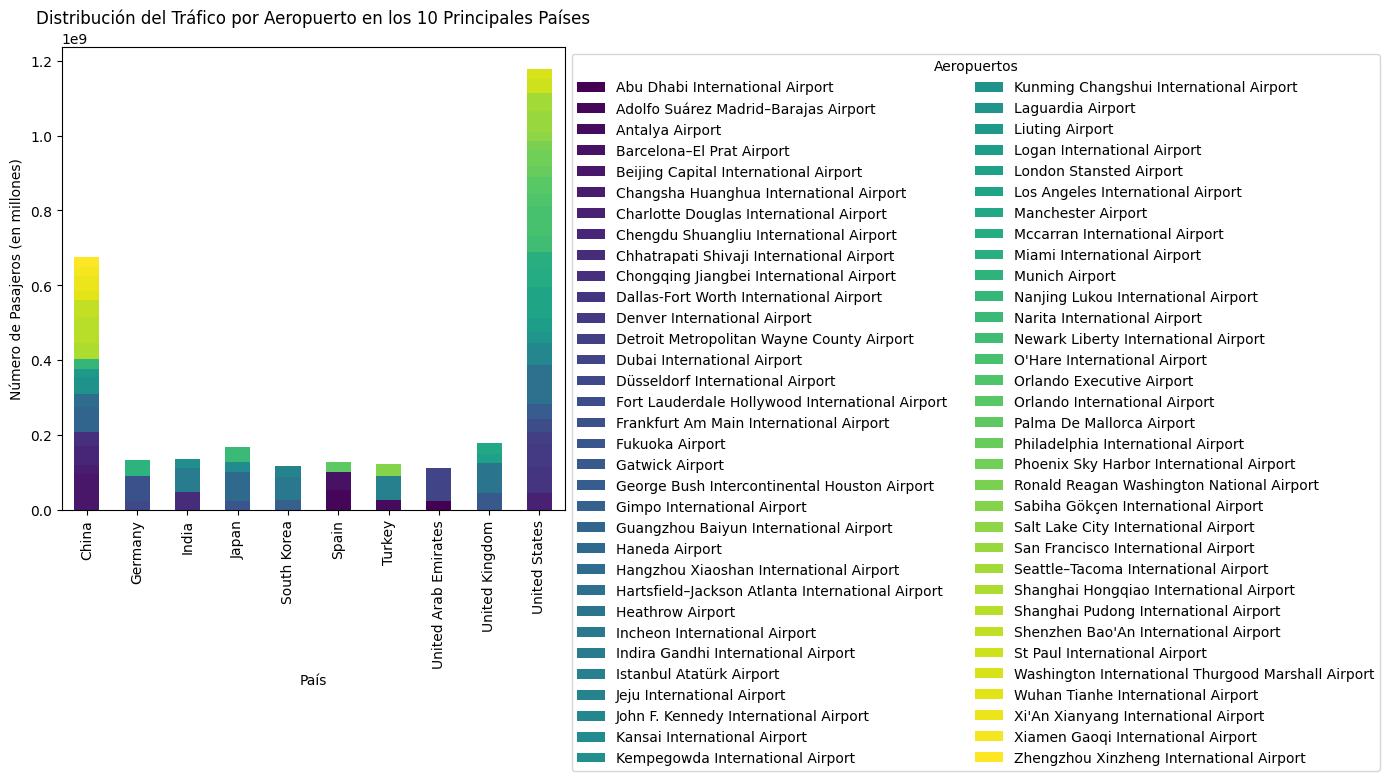

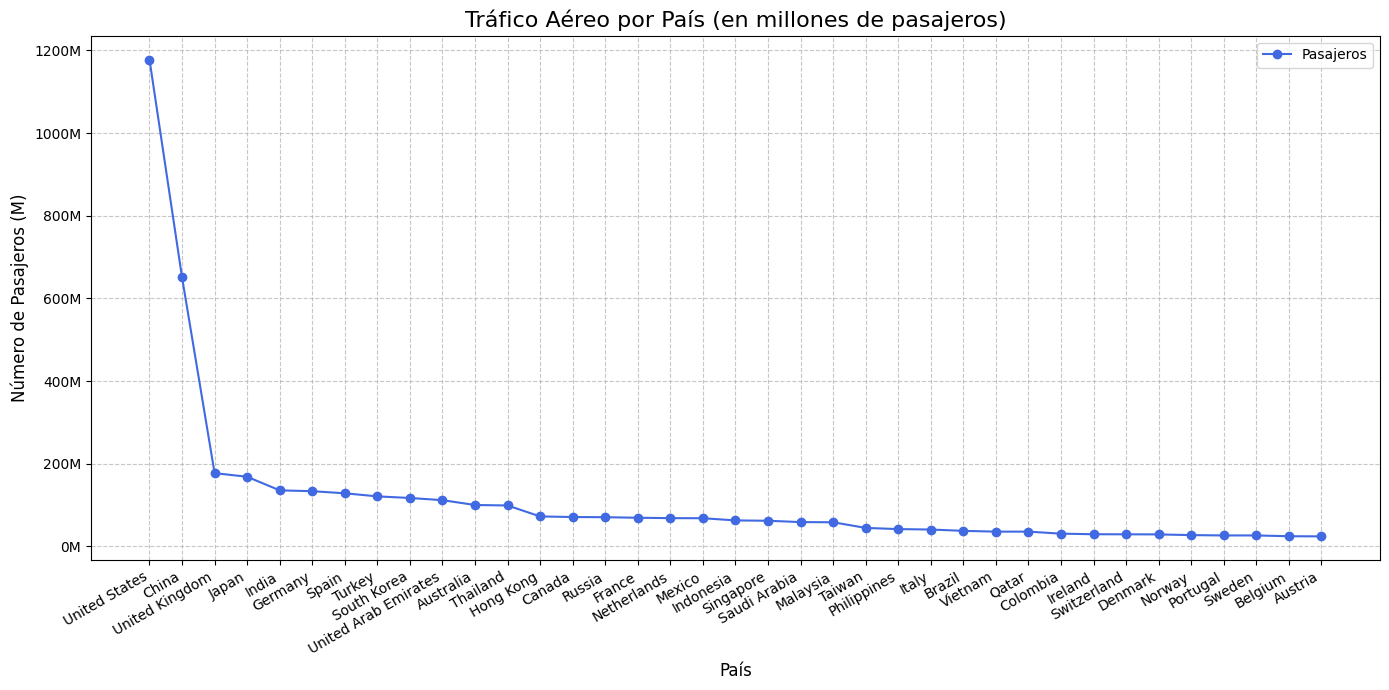

/var/folders/09/w_db8nmn3gz3jg3kjf4qn50m0000gn/T/ipykernel_99173/3091663460.py:107: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




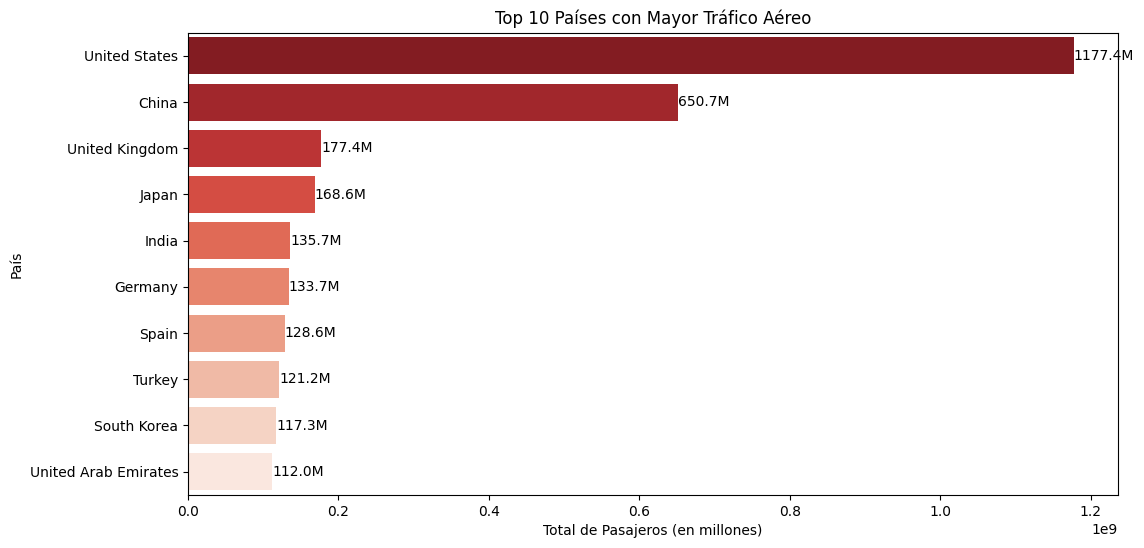

✅ Análisis de correlación y clustering completados.

🔍 Análisis de Correlación


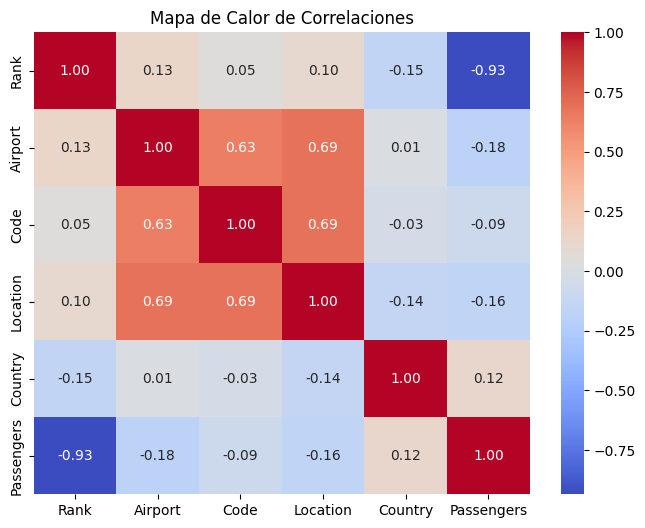


🔍 Clustering de Aeropuertos


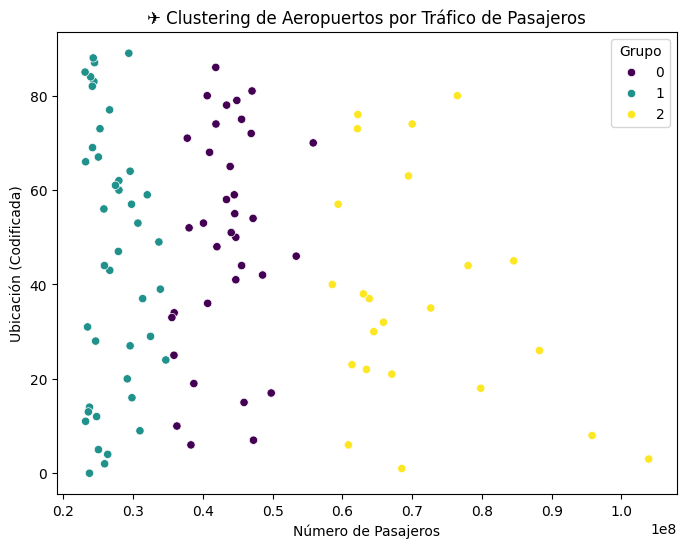

/Users/nicolasalderete/Documents/Proyectos/Top-100-Airports-Analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



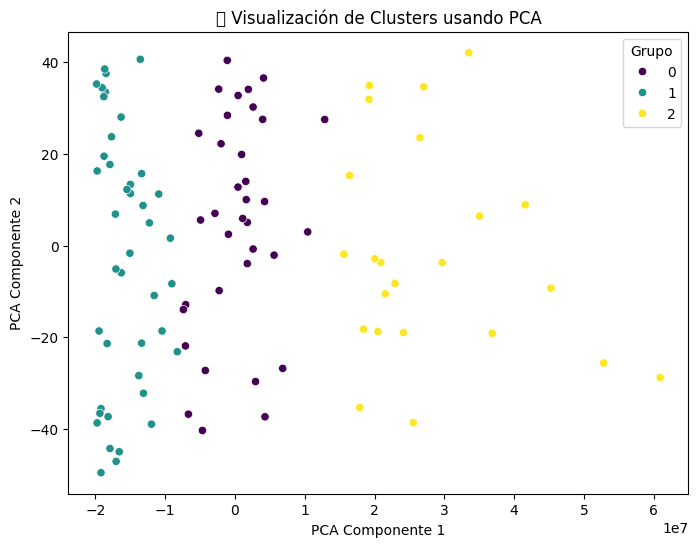

✅ Análisis de correlación y clustering completados.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Cargar el dataset limpio
file_path = "../data/clean_airports.csv"
df = pd.read_csv(file_path)

# ANÁLISIS ESTADÍSTICO
print("\n🔹 Información general del dataset:")
df.info()

print("\n🔹 Estadísticas descriptivas:")
print(df.describe())

print("\n🔹 Aeropuertos con más tráfico:")
print(df[['Airport', 'Passengers']].sort_values(by='Passengers', ascending=False).head(10))


# ------------------------------
# 1. Gráfico de Barras - Top 10 Aeropuertos Más Transitados
# ------------------------------
top_airports = df.nlargest(10, 'Passengers')

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Passengers', y='Airport', data=top_airports, palette="Blues_r")
plt.xlabel("Número de Pasajeros")
plt.ylabel("Aeropuerto")
plt.title("Top 10 Aeropuertos Más Transitados")
# Añadir etiquetas de valor en las barras
for i, value in enumerate(top_airports['Passengers']):
    plt.text(value, i, f"{value/1e6:.1f}M", va='center', ha='left')
plt.show()


# ------------------------------
# 2. Histograma de Pasajeros por Aeropuerto
# ------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Passengers'], bins=20, kde=True, color='blue')
plt.xlabel("Número de Pasajeros (en millones)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Pasajeros en los Aeropuertos")
plt.xticks(ticks=plt.xticks()[0], labels=[f"{int(x/1e6)}M" for x in plt.xticks()[0]])
plt.show()


# ------------------------------
# 3. Gráfico de Barras Apiladas - Países con Mayor Tráfico Aéreo
# ------------------------------
country_airports = df.groupby(['Country', 'Airport'])['Passengers'].sum().reset_index()
top_countries = country_airports.groupby('Country')['Passengers'].sum().nlargest(10).index
filtered_data = country_airports[country_airports['Country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
stacked_plot = filtered_data.pivot(index='Country', columns='Airport', values='Passengers')
stacked_plot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title("Distribución del Tráfico por Aeropuerto en los 10 Principales Países")
plt.xlabel("País")
plt.ylabel("Número de Pasajeros (en millones)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Aeropuertos", ncol=2)
plt.tight_layout()
plt.show()


# ------------------------------
# 4. Gráfico de Líneas - Tráfico Aéreo por País
# ------------------------------
country_traffic = df_cleaned.groupby('Country')['Passengers'].sum().reset_index().sort_values('Passengers', ascending=False)

# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))
plt.plot(country_traffic['Country'], country_traffic['Passengers'], marker='o', linestyle='-', color='royalblue', label='Pasajeros')

# Ajustar etiquetas del eje X
plt.xticks(rotation=30, ha='right', fontsize=10)

# Formatear eje Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Títulos y etiquetas
plt.title("Tráfico Aéreo por País (en millones de pasajeros)", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de Pasajeros (M)", fontsize=12)

# Añadir grid y leyenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# ------------------------------
# 5. Gráfico de Barras Horizontal - Top 10 Países con Mayor Tráfico Aéreo
# ------------------------------
top_countries = country_traffic.head(10)

plt.figure(figsize=(12, 6))
barh_plot = sns.barplot(x=top_countries['Passengers'], y=top_countries['Country'], palette="Reds_r")
plt.xlabel("Total de Pasajeros (en millones)")
plt.ylabel("País")
plt.title("Top 10 Países con Mayor Tráfico Aéreo")
# Añadir etiquetas de valor en las barras
for i, value in enumerate(top_countries['Passengers']):
    plt.text(value, i, f"{value/1e6:.1f}M", va='center', ha='left')
plt.show()


print("✅ Análisis de correlación y clustering completados.")



# ------------------------------
# 6. Análisis de correlación 
# ------------------------------
print("\n🔍 Análisis de Correlación")

# Convertir las variables categóricas en numéricas para la correlación
df_encoded = df.copy()
df_encoded["Location"] = df_encoded["Location"].astype("category").cat.codes
df_encoded["Airport"] = df_encoded["Airport"].astype("category").cat.codes
df_encoded["Country"] = df_encoded["Country"].astype("category").cat.codes
df_encoded["Code"] = df_encoded["Code"].astype("category").cat.codes

# Calcular la matriz de correlación
corr_matrix = df_encoded.corr()

# Visualizar la correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


# ------------------------------
# 7. Clustering
# ------------------------------
print("\n🔍 Clustering de Aeropuertos")

# Seleccionar la variable a usar en el clustering
X = df_encoded[['Passengers', 'Location']]

# Aplicar K-Means para agrupar aeropuertos
num_clusters = 3  # Definimos 3 grupos
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_encoded["Cluster"] = kmeans.fit_predict(X)

# Visualizar los clusters con un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded["Passengers"], y=df_encoded["Location"], hue=df_encoded["Cluster"], palette="viridis")
plt.xlabel("Número de Pasajeros")
plt.ylabel("Ubicación (Codificada)")
plt.title("✈️ Clustering de Aeropuertos por Tráfico de Pasajeros")
plt.legend(title="Grupo")
plt.show()

# Aplicar PCA para reducir dimensiones y visualizar los clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_encoded["PCA1"] = X_pca[:, 0]
df_encoded["PCA2"] = X_pca[:, 1]

# Gráfico de dispersión con PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded["PCA1"], y=df_encoded["PCA2"], hue=df_encoded["Cluster"], palette="viridis")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.title("📌 Visualización de Clusters usando PCA")
plt.legend(title="Grupo")
plt.show()

print("✅ Análisis de correlación y clustering completados.")


In [9]:
from geopy.geocoders import Nominatim
import pandas as pd
from tqdm import tqdm
import folium
from folium.plugins import HeatMap
from IPython.display import display

# ------------------------------
# 8. Mapa de calor 
# ------------------------------

# Configurar Geopy
geolocator = Nominatim(user_agent="airport_locator")

# Cargar el dataset limpio
file_path = "../data/clean_airports.csv"
df = pd.read_csv(file_path)

# Crear columnas para latitud y longitud
df['Latitude'] = None
df['Longitude'] = None

# Usar Geopy para obtener coordenadas
tqdm.pandas()  # Progreso para el bucle

def get_coordinates(location):
    try:
        location = geolocator.geocode(location)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error obteniendo coordenadas para {location}: {e}")
        return None, None

# Aplicar función para obtener coordenadas
df[['Latitude', 'Longitude']] = df['Location'].progress_apply(lambda x: pd.Series(get_coordinates(x)))

# Filtrar filas con coordenadas válidas
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Crear el mapa base
mapa = folium.Map(location=[20.0, 0.0], zoom_start=2)

# Agregar capa de calor
HeatMap(data=df_cleaned[['Latitude', 'Longitude', 'Passengers']].values, radius=15).add_to(mapa)

# Guardar el mapa como archivo HTML
mapa.save("mapa_calor_aeropuertos.html")
print("Mapa guardado como 'mapa_calor_aeropuertos.html'.")

display(mapa)



100%|██████████| 100/100 [02:33<00:00,  1.54s/it]

Mapa guardado como 'mapa_calor_aeropuertos.html'.


In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo

# ------------------------------
# 9. Histograma - Distribución de pasajeros por aeropuerto
# ------------------------------

# Configurar el renderizador 
pio.renderers.default = 'notebook'
pyo.init_notebook_mode(connected=True)

# Crear histograma interactivo con mejoras
fig = px.histogram(
    df_cleaned,
    x='Passengers',
    nbins=15,  # Ajuste del número de bins para mayor claridad
    title='Distribución de Pasajeros por Aeropuerto'
)

# Ajustar el formato de los ejes y mejorar la estética
fig.update_layout(
    width=900,  # Ajusta según tu preferencia
    height=500,  # Ajusta según tu preferencia
    xaxis_title='Número de Pasajeros',
    yaxis_title='Número de Aeropuertos en el Rango',
    xaxis=dict(tickformat=".2s"),
    yaxis=dict(title_font=dict(size=14)),
    title=dict(font=dict(size=20))
)
# Mejorar interactividad y apariencia
fig.update_traces(
    marker=dict(color='rgba(0,0,255,0.7)', line=dict(color='blue', width=1)),
    hovertemplate='Pasajeros: %{x}<br>Número de Aeropuertos: %{y}'
)

# Mostrar el gráfico
fig.show()


In [29]:
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo

# ------------------------------
# 10. Bubble Chart - Tráfico de paises con Burbujas
# ------------------------------

# Configurar el renderizador para que funcione en el navegador
pio.renderers.default = 'browser'
pyo.init_notebook_mode(connected=True)

# Crear el Bubble Chart
fig.update_layout(
    width=1000,  # Ajusta según el espacio disponible
    height=500,  # Ajusta para una mejor visualización
    xaxis_title="País",
    yaxis_title="Número de Pasajeros"
)

fig.update_layout(
    xaxis=dict(tickangle=-45)  # Rotar etiquetas 45 grados para mejor lectura
)

fig.show()
